# **Statistics lecture 4 Hands-on session : solutions notebook**

This is the companion notebook to lecture 4 in the statistical course series, covering the following topics:
1. Parameter estimation using simple tools
2. Parameter estimation using the profile likelihood
3. Limit-setting, using simple tools
4. Limit-setting using the profile likelihood

First perform the usual imports:

In [1]:
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt

## 1. Parameter estimation using simple techniques

In the previous lecture, we have applied hypothesis testing to a simple counting experiment, using the observed count $n$ as discriminant.
Recall the example we used:

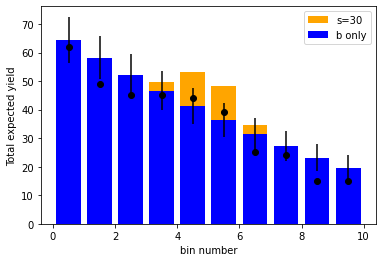

In [2]:
nbins = 10
x = np.linspace(0.5, nbins - 0.5, nbins)
# The background follows a linear shape
b_yields = np.array([ (1 - i/2/nbins) for i in range(0, nbins) ])
b_yields *= b_yields/np.sum(b_yields)
# The signal shape is a peak
s_yields = np.zeros(nbins)
s_yields[3:7] = [ 0.1, 0.4, 0.4, 0.1 ]
# Now generate some data for s=10
s = 10
b = 500
s_and_b = s*s_yields + b*b_yields
b_only = b*b_yields
np.random.seed(1) # make sure we always generate the same
data = [ np.random.poisson(s*s_yield + b*b_yield) for s_yield, b_yield in zip(s_yields, b_yields) ]
s30_and_b = 30*s_yields + b*b_yields
plt.bar(x, s30_and_b, color='orange', label='s=30')
plt.bar(x, b_only, color='b', yerr=np.sqrt(b_only), label='b only')
plt.scatter(x, data, zorder=10, color='k')
plt.xlabel('bin number')
plt.ylabel('Total expected yield')
plt.legend();

There are some fluctuations in the data, but it seems that the $s$ is fairly small compared to the $s=30$ shown in orange (note that we cheated and generated the data for $s=10$, so this is not unexpected!). We can use the tools defined in the previous lecture to find the best-fit $s$:

In [3]:
# ==> First define the log-likelihood function lambda = -2 log L as in the previous class 
def lambda_s(s_hypo, dataset) :
    pass # Your code here to compute the log-likelihood of the model with s=s_hypo for the provided dataset

from scipy.optimize import minimize_scalar

# ==> Minimize it for the observed data, using minimize_scalar as before (use a python lambda construct to set dataset=data in lambda_s)


You should see that it is indeed pretty small compared to 30. However we also want an uncertainty to go with the central value -- this allows for instance to estimate the compatibility with a reference value such as $s=0$ or $s=30$.

We'll see how to do this properly in the next section, but we'll try a simpler situation first.

For this, only consider a measurement in one bin, and assume it is Gaussian:

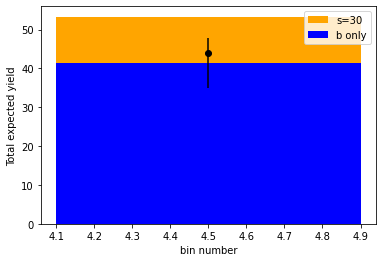

In [4]:
sb4 = s30_and_b[4]
b4 = b_only[4]
n4 = data[4]
plt.bar(x[4], sb4, color='orange', label='s=30')
plt.bar(x[4], b4, color='b', yerr=np.sqrt(b_only[4]), label='b only')
plt.scatter(x[4], n4, zorder=10, color='k')
plt.xlabel('bin number')
plt.ylabel('Total expected yield')
plt.legend();

In this simple model, the best-fit value is

In [5]:
# ==> Compute the best-fit signal s4

And more importantly, we know that the uncertainty on this value is

In [6]:
# ==> Compute the uncertainty sigma4 on s4

You should find $s_4 = 2.7 \pm 6.6$.

One thing to understand about this result: it does not mean the true value is necessarily between $2.7 - 6.6$ and $2.7 + 6.6$. The interval is to be taken in the sense of a Gaussian distribution: there is a $68\%$ chance that the true value $s_4^*$ is indeed somewhere in this interval, but it can also fall outside (in 32% of cases).

This can be illustrated as follows, where we draw a large number of random values for n4 and compute the interval for each case:

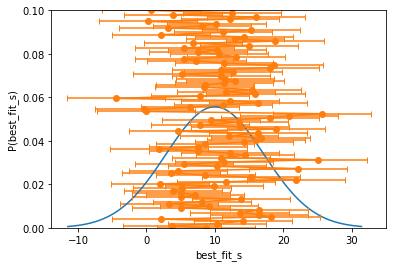

In [7]:
# Generate 100 random values of n4, for a true signal of 10
ntoys = 100
s_true = 10
toy_sigma4 = np.sqrt(10 + b4)
toy_n4s = [ np.random.normal(b4 + s_true, toy_sigma4) for i in range(0, ntoys) ]

# Plot the intervals
s_range = np.arange(s_true - 3*toy_sigma4, s_true + 3*toy_sigma4,0.1)
plt.plot(s_range, scipy.stats.norm.pdf(s_range, loc=s_true, scale=toy_sigma4))
plt.ylim(0,0.1)
plt.xlabel('best_fit_s')
plt.ylabel('P(best_fit_s)')
plt.errorbar(x = toy_n4s - b4, y = np.linspace(0, 0.10, ntoys), xerr=[ toy_sigma4 ] *ntoys, capsize=3, marker='o');

# ==> Compute the best-fit s4 and the interval for each toy, then count the number of intervals that contain the true value s=10

If all goes well, you should find that the fraction of intervals containing the true value is 68\% as expected (you can increase the number of toys to get a better estimate, although the plot will look more cluttered...) 

## 2. Parameter estimation using likelihood methods

The above method is only applicable to single-bin measurements, so we need something better for our multi-bin case.

To test some value $s$, we use the likelihood-based discriminant
$$
t(s) = -2 \log \frac{L(s)}{L(\hat{s})}
$$
following the same principle as for discovery. Define it:

In [8]:
def t_s(s_test) :
    pass # ==> Replace this with the definition, in terms of lambda_s and the s_hat computed in section 1

Now plot it:

In [9]:
s_vals = np.arange(-10,20,1)
# ==> Plot t_s(s) for the s values above

Yoj should find a parabola, which is expected for a near-Gaussian case. A short computation shows that for a Gaussian likelihood $\hat{s} \sim G(s, \sigma_s)$, one has
$$
t(s) = \left(\frac{s - \hat{s}}{\sigma_s}\right)^2
$$
which explains the parabola.

In this Gaussian case, the $\pm 1\sigma$ uncertainties are reached for $t(s)=1$. We will assume that this still holds true in not-so-Gaussian cases, so that we **define** the uncertainties using the crossings with $t(s)=1$:

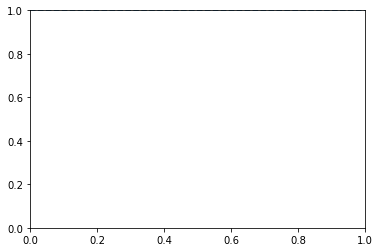

In [10]:
# ==> Plot t(s) again

# Draw the t(s) = 1 line for illustration
plt.axhline(1, linestyle='--');

# ==> Now compute the s values for which t(s)=1, which will give the endpoints of the confidence intervals
#     You can use the function scipy.optimize.root_scalar(func, bracket=(lo, hi)).root
#     which returns the root of the function 'func' over the interval (lo, hi)
#     Note that lambda s : t_s(s) - 1 can be used to define an appropriate 'func' in our case

This defines a type of confidence intervals called *likelihood intervals* which are not quite exact in the non-Gaussian case but are an excellent approximation to the exact ones. Non-Gaussian effects are accounted for in the expression of $t(s)$, which here uses a Poisson expression, so this is a better approximation than just assuming that everything is Gaussian. This type of technique is usually referred to as an *asymptotic approximation*, and we'll see a similar example below for the limits.

## 3.  Limit-setting using simple tools

Measuring the signal is useful when it is large, but when it is very small it can be more interesting to set an upper limit on it. This means computing the value of the signal yield that is large enough to be excluded with a given confidence level, typically 95%.


This happens to be the case for our measurement, so we can apply the limit-setting here. To start with, we consider only the measurement in bin 4.

This "95%" means that if we would repeat the experiment many times, the true signal would be below the limit 95% of the time.  This is also represented in the picture below, with the shaded area corresponding to 5% of the integral.

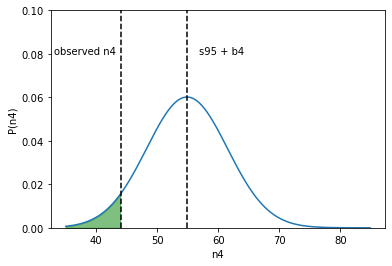

In [11]:
sigma4 = np.sqrt(n4)
ns = np.arange(35,85,0.1)
plt.plot(ns, scipy.stats.norm.pdf(ns, loc=n4 + 1.64*sigma4, scale=sigma4))
plt.ylim(0,0.1)
plt.xlabel('n4')
plt.ylabel('P(n4)')

up = 1
shaded_ns = np.arange(35, n4, 0.1)
plt.fill_between(shaded_ns, scipy.stats.norm.pdf(shaded_ns, loc=n4 + 1.64*sigma4, scale=sigma4), alpha=0.5, color='g')
plt.axvline(x=n4 + 1.64*sigma4, linestyle='--', color='k')
plt.axvline(x=n4, linestyle='--', color='k')
plt.text(n4 + 1.64*sigma4 + 2, 0.08, 's95 + b4')
plt.text(n4 - 11, 0.08, 'observed n4');

Let's now compute the limit in the single-bin case, using the values of $s_4$, $b_4$ $\sigma_4$ and $n_4$ defined in the previous sections.

In [12]:
# ==> Compute s95 (as a function of b4, sigma4 and n4) so that the figure above is correct -- i.e. the shaded area corresponds to 5% of the total

## 4. Limit-setting in the general case

Now let's apply limit-setting on the multi-bin example. This is justified here, since from the previous section we know the signal is not large.

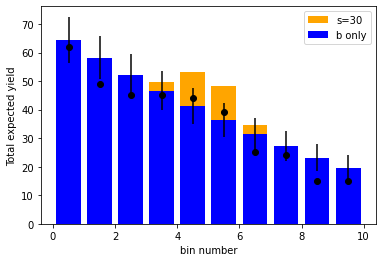

In [13]:
plt.bar(x, s30_and_b, color='orange', label='s=30')
plt.bar(x, b_only, color='b', yerr=np.sqrt(b_only), label='b only')
plt.scatter(x, data, zorder=10, color='k')
plt.xlabel('bin number')
plt.ylabel('Total expected yield')
plt.legend();

As usual, we use the likelihood-based discriminant
$$
t(s)  = -2 \log \frac{L(s)}{L(\hat{s})}
$$

The only difference compared to parameter measurement is that we will only consider the positive side of the distribution, $s > \hat{s}$, since we are looking for an *upper* limit. 

As we saw before, for the Gaussian case we have
$$
t(s) = \left(\frac{s - \hat{s}}{\sigma_s}\right)^2
$$
so that the limit is reached for $t(s) = 1.64^2$. Of course our model is not exactly Gaussian, but we can still use the Gaussian relation $t(s) = 1.64^2$ to define our limit, using the exat non-Gaussian expression for $t(s)$. This still accounts for non-Gaussianity through the expression of $t(s)$, and usually provides an excellent approximation to the true limit. This technique is usually referred to as the *asymptotic* approximation.

Another way to find the limit is to note that the p-value is given by $1 - \Phi\left(\sqrt{t(s)}\right)$, assuming the Gaussian/asymptotic approximation. This allows to compute the p-value as a function of $s$. Then to compute the limit, we check when this p-value reaches 5% (for a 95% CL limit)


In [14]:
s_vals = np.linspace(10, 50, 100)
# ==> plot 1 - Phi(sqrt(t_s)) for the values of s above
# ==> Find the crossing of the curve above with 0.05, using root_scalar as for the intervals. This defines the 95% CL limit

## 5. Expected limits

One can compute *expected* limits for a given scenario, for instance $s=0$. This can be obtained using 2 methods:
* By generating "toy datasets" (pseudo-experiments), computing the limit for each one and histogramming the result
* by fitting a special "Asimov" dataset that is constructed to precisely correspond to this hypothesis. For instance here one would build a dataset consisting only of background.

First, we investigate the difference between the two:

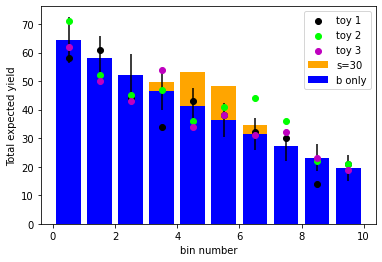

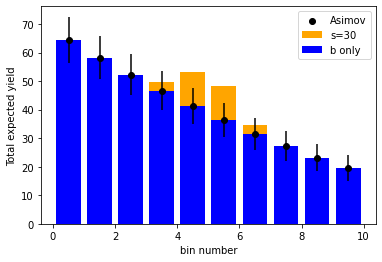

In [15]:
toy_data1 = np.random.poisson(b_only)
toy_data2 = np.random.poisson(b_only)
toy_data3 = np.random.poisson(b_only)
plt.bar(x, s30_and_b, color='orange', label='s=30')
plt.bar(x, b_only, color='b', yerr=np.sqrt(b_only), label='b only')
plt.scatter(x, toy_data1, zorder=10, color='k', label='toy 1')
plt.scatter(x, toy_data2, zorder=10, color='lime', label='toy 2')
plt.scatter(x, toy_data3, zorder=10, color='m', label='toy 3')
plt.xlabel('bin number')
plt.ylabel('Total expected yield')
plt.legend()
plt.figure()
asimov = b_only
plt.bar(x, s30_and_b, color='orange', label='s=30')
plt.bar(x, b_only, color='b', yerr=np.sqrt(b_only), label='b only')
plt.scatter(x, asimov, zorder=10, color='k', label='Asimov')
plt.xlabel('bin number')
plt.ylabel('Total expected yield')
plt.legend();


The toys fluctuate around the b-only expectation, while the Asimov perfectly lines up with it by definition.

To get Asimov-based results, one also includes the range of variations of these limits due to the fluctuations of $\hat{s}$. Since
$$
t(s) = \left(\frac{s - \hat{s}}{\sigma_s}\right)^2
$$
the $\pm 1\sigma$ variations in the limit are given by
$$
\sqrt{t(s)} \to \sqrt{t(s)} \pm 1 \text{ for the } \pm 1\sigma \text{ variation}
$$


In [16]:
# Define the t_s function for the Asimov dataset. This has the technical problem that Asimov datasets have non-integer
# bin contents, so one cannot use the simple Poisson PDF any more (which is defined only for integers). Instead, the
# Gamma function can be used:
def lambda_gamma_s(s_hypo, data) :
    return -2*sum( [ np.log(scipy.stats.gamma.pdf(n+1, s_hypo*s_yield + b*b_yield)) for n, s_yield, b_yield in zip(data, s_yields, b_yields) ] )

def t_s_asimov(s_test) :
    return lambda_gamma_s(s_test, asimov) - lambda_gamma_s(0, asimov)

s_vals = np.linspace(10, 60, 100)

# ==> Compute the observed limit as before [using scipy.stats.norm.sf(np.sqrt(t_s(s_vals))) ]

# ==> Compute the 'expected', the central value of Asimov-expected limit,  as well as the variations 
#     'exp_pos1', 'exp_neg1', 'exp_pos2' and 'exp_neg2' for the +/-1 and 2 sigma variations
#     Note that this should be done using the t_s_asimov function above

# ==> Plot the results using plot_between to draw the error ranges

As before, we can find the limit values by looking at the intersection with $p=0.05$

## 6. $CL_s$ limits

We now add one last wrinkle: the $CL_s$ procedure. This is an additional correction on top of the limit setting procedure described above, to avoid the limit going negative. Just to see why this is needed, recall how we set the limit in the 1-bin case:

In [17]:
# ==> Compute the limit as above

Now imagine we had a negative fluctuation in $n_4$, and repeat the computation

In [18]:
n4 = 30
# ==> Compute the limit again for this value of n4

You should see a negative limit (!). This requires a pretty large fluctuation, but it can happen. Of course we know that the signal is positive, so we know that this is due to a fluctuation: basically we know that we are in those 5% of experiments where the limit isn't valid.

One way to do this is to correct the p-value for $s \sim 0$ to avoid setting an exclusion in this region. This is what $CL_s$ does, by using
$$
p_{CL_s} = \frac{p(s)}{p(s=0)}
$$
as a modified p-value. If there is good exclusion near 0 ($p(0) \ll 1$) then the denominator is small, which inflates $p_{CL_s}$ and makes the exclusion weaker.
We can modify our previous example to do this:

In [19]:
# ==> Compute the observed and expected limits and the +/- 1 and 2 sigma variations
#     This is computed as p/p(s=0) where p are the values computed above (observed, expected, etc.)
#     and p(s=0) is 
#      * scipy.stats.norm.sf(np.sqrt(t_s(s)) - np.sqrt(t_s_asimov(s))) for the observed
#      * scipy.stats.norm.sf(np.sqrt(t_s_asimov(s)) - np.sqrt(t_s_asimov(s)) +/- n) for the expected +/- n sigma
# ==> Plot the result


You should see that the exclusion indeed becomes weaker near 0, which is now not excluded anymore by the $2\sigma$ band.